In [1]:
import deeplake
ds = deeplake.load("hub://activeloop/hmdb51-train")

/

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/hmdb51-train



|

hub://activeloop/hmdb51-train loaded successfully.



In [26]:
cnt = int(input())

In [27]:
x = []
y = []

for i in range(0,cnt):
    x.append(float(input("type : ")))
    y.append(float(input('type: ')))
x,y

([1.0, 2.0, 3.0, 4.0, 6.0], [1.0, 4.0, 6.0, 7.0, 8.0])

In [28]:
epoch = 1000
rate = 0.01
m = 1
b = 0

In [29]:
for j in range(0,epoch):
    sum = 0
    for i in range(0,cnt):
        sum = -(y[i] - (m*x[i]+b))
        error = sum/cnt
        b = b - error*rate
    sum = 0
    for i in range(0,cnt):
        sum = -x[i]*(y[i] - (m*x[i]+b))
        m = m - sum/cnt*rate

In [30]:
m

1.3284157436488224

In [31]:
b

0.928515469094045

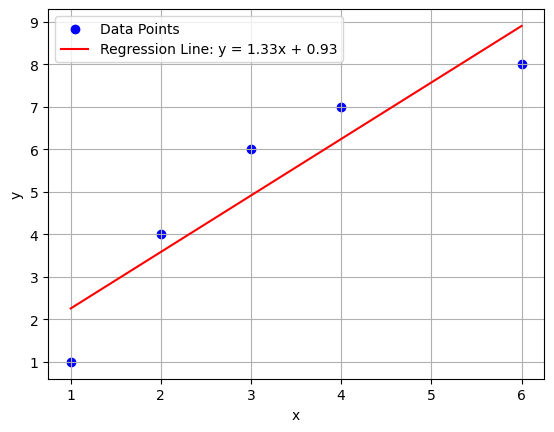

In [32]:
import matplotlib.pyplot as plt


# Plot the original data points
plt.scatter(x, y, label='Data Points', color='blue')

# Plot the final regression line
plt.plot(x, [m * xi + b for xi in x], label=f'Regression Line: y = {m:.2f}x + {b:.2f}', color='red')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [36]:
'a' < 'b'

True

In [7]:
import cv2 as cv
import mediapipe as mp
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import UCF101
from torch.utils.data import DataLoader
import os
import pandas as pd

def skeleton_csv(video_path ='', output_video_path ='', make_video=True, output_video_name='skeleton_video'):
    # Initialize MediaPipe Pose
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    pose = mp_pose.Pose(static_image_mode=False, model_complexity=1, enable_segmentation=False, min_detection_confidence=0.5)

    cap = cv.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Unable to open video file at path:", video_path)
        return None
    all_landmarks = []

    # Get video properties for output video
    frame_width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv.CAP_PROP_FPS)

    # Define the codec and create VideoWriter object
    out = None
    if make_video:
        output_video_name = output_video_name + '.mp4'
        output_video_path = os.path.join(output_video_path, output_video_name)
        out = cv.VideoWriter(output_video_path, cv.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break

        image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        if results.pose_landmarks:
            # Draw the pose annotation on the image
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Extract and store landmarks
            ref_x = (results.pose_landmarks.landmark[23].x + results.pose_landmarks.landmark[24].x) / 2
            ref_y = (results.pose_landmarks.landmark[23].y + results.pose_landmarks.landmark[24].y) / 2
            ref_z = (results.pose_landmarks.landmark[23].z + results.pose_landmarks.landmark[24].z) / 2

            landmarks = []
            for lm in results.pose_landmarks.landmark:
                rel_x, rel_y, rel_z = lm.x - ref_x, lm.y - ref_y, lm.z - ref_z
                landmarks.extend([rel_x, rel_y, rel_z, lm.visibility])
            all_landmarks.append(landmarks)

            if make_video:
                out.write(image)  # Write the frame with pose to the output video

    cap.release()
    if make_video:
        out.release()

    df = pd.DataFrame(all_landmarks)

    print("Processing completed.")
    return df


In [31]:
a = skeleton_csv(video_path='../data/mevid.mp4')

I0000 00:00:1701094779.844311       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1


Processing completed.


In [39]:
a

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.095554,-0.702015,-0.742240,0.999754,0.106620,-0.737535,-0.691841,0.999351,0.113945,-0.735870,...,1.036879,0.000876,0.017414,0.808612,0.716940,0.000739,-0.071028,0.800175,0.689355,0.000636
1,0.091691,-0.714895,-0.695079,0.999548,0.103328,-0.749382,-0.643398,0.998977,0.110772,-0.747432,...,0.763920,0.002078,0.021443,0.855708,0.594731,0.000988,-0.070607,0.844015,0.404847,0.001000
2,0.092476,-0.722617,-0.636977,0.999281,0.104733,-0.755894,-0.587622,0.998440,0.111948,-0.753674,...,0.615536,0.002633,0.015330,0.865133,0.431673,0.001102,-0.079572,0.849466,0.261784,0.001145
3,0.103064,-0.724118,-0.721881,0.999087,0.115113,-0.756933,-0.665485,0.998126,0.122788,-0.754391,...,0.634549,0.002979,-0.003290,0.868734,0.275815,0.001358,-0.098394,0.848189,0.254416,0.001455
4,0.098027,-0.723416,-0.692127,0.998805,0.110134,-0.755663,-0.637423,0.997702,0.117495,-0.752661,...,0.676724,0.003706,-0.017171,0.863436,0.319867,0.001608,-0.114330,0.840228,0.319857,0.001843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.157861,-0.032130,-0.099429,0.998420,0.165385,-0.033228,-0.099227,0.998482,0.165550,-0.033029,...,0.147362,0.281822,0.224418,0.014474,-0.473703,0.764247,0.202116,0.009621,0.104517,0.306830
249,0.158623,-0.032203,-0.096512,0.998519,0.165804,-0.033490,-0.095192,0.998572,0.165806,-0.033335,...,0.129346,0.282081,0.222450,0.014292,-0.462784,0.773331,0.196559,0.009594,0.086778,0.309517
250,0.158620,-0.032531,-0.098780,0.998594,0.166038,-0.034189,-0.097393,0.998637,0.166118,-0.034056,...,0.123934,0.280946,0.217802,0.013910,-0.450624,0.779143,0.191738,0.009530,0.080441,0.310388
251,0.158471,-0.033090,-0.094000,0.998654,0.165968,-0.034859,-0.092284,0.998691,0.166105,-0.034754,...,0.085998,0.280680,0.216434,0.013518,-0.447189,0.780311,0.189923,0.009998,0.041395,0.311292


In [48]:
ddatta = a.iloc[:90, :].values.tolist()
len(ddatta)

90

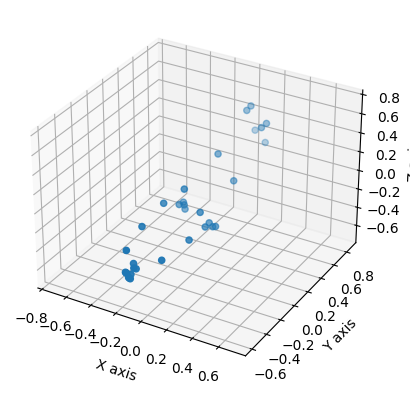

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_skeleton(landmark_list):
    assert len(landmark_list) == 132, "The input list must have 132 elements."
    
    # Extracting x, y, z coordinates
    x_coords = landmark_list[0::4]
    y_coords = landmark_list[1::4]
    z_coords = landmark_list[2::4]

    # Creating a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the landmarks
    ax.scatter(x_coords, y_coords, z_coords)

    # Setting labels
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    # Set equal aspect ratio for all axes
    max_range = max(max(x_coords) - min(x_coords), max(y_coords) - min(y_coords), max(z_coords) - min(z_coords)) / 2
    mid_x = (max(x_coords) + min(x_coords)) * 0.5
    mid_y = (max(y_coords) + min(y_coords)) * 0.5
    mid_z = (max(z_coords) + min(z_coords)) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    plt.show()

# Example usage
# plot_3d_skeleton(your_132_feature_list)
plot_3d_skeleton(first)

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

class SkeletonLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(SkeletonLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))

        out = self.fc(out[:, -1, :])
        return out


model = SkeletonLSTM(input_size=132, hidden_size=64, num_layers=2, num_classes=2) # 클래스 수는 예시

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#exampel dataloader
train_loader = [(ddatta,0),(ddatta,1)]

num_epochs = 10
for epoch in range(num_epochs):
    for i, (skeletons, labels) in enumerate(train_loader):
        outputs = model(skeletons)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


AttributeError: 'list' object has no attribute 'size'

In [2]:
from tkinter import *
import math

def button_click(event):
    text = event.widget.cget("text")
    try:
        if text == "=":
            result = eval(display.get().replace('^', '**').replace('π', 'math.pi'))
            display.delete(0, END)
            display.insert(END, result)
        elif text == "C":
            display.delete(0, END)
        elif text == "√":
            current_value = float(display.get())
            sqrt_value = math.sqrt(current_value)
            display.delete(0, END)
            display.insert(END, sqrt_value)
        else:
            display.insert(END, text)
    except Exception as e:
        display.delete(0, END)
        display.insert(END, "Error")

window = Tk()
window.title("My Calculator")
display = Entry(window, width=33, bg="white")
display.grid(row=0, column=0, columnspan=5)

button_list = [
    '7', '8', '9', '/', 'C',
    '4', '5', '6', '*', '√',
    '1', '2', '3', '-', '^',
    '0', '.', '=', '+', 'π'
]

row_index = 1
col_index = 0

for button_text in button_list:
    button = Button(window, text=button_text, width=5)
    button.grid(row=row_index, column=col_index)
    button.bind("<Button-1>", button_click)
    col_index += 1
    if col_index > 4:
        row_index += 1
        col_index = 0

window.mainloop()

In [3]:
numbers = []
while(1):
    a = int(input())
    if a <= 0:
        break
    numbers.append(a)

sd = sorted(numbers)

print(f"max : {sd[len(sd)-1]}")
print(f"mid : {sd[int(len(sd)/2-1)]}")
print(f"min : {sd[0]}")


max : 5
mid : 2
min : 1


물론, 클래스와 상속에 대한 연습 문제를 제공해 드릴 수 있습니다. 다음은 Python을 사용한 간단한 클래스 및 상속 연습 문제입니다. 이 문제를 통해 클래스와 상속을 연습할 수 있습니다.

**문제 1: 간단한 클래스 만들기**
클래스 "Person"을 만들어 보세요. 이 클래스는 다음 속성을 가지고 있어야 합니다.

- 이름 (name)
- 나이 (age)

그리고 "Person" 클래스의 객체를 생성하고 속성을 설정하는 코드를 작성하세요.

**문제 2: 상속**
이제 "Person" 클래스를 상속받는 "Student" 클래스를 만들어 보세요. "Student" 클래스는 "Person" 클래스를 확장하며 다음 추가 속성을 가집니다.

- 학번 (student_id)
- 학교 (school)

그리고 "Student" 클래스의 객체를 생성하고 속성을 설정하는 코드를 작성하세요.

**문제 3: 메서드 추가**
"Person" 클래스에 "greet"라는 메서드를 추가하세요. 이 메서드는 다른 사람을 인사하는 메시지를 출력해야 합니다. 그런 다음 "Student" 클래스도 "greet" 메서드를 상속받아서 사용하도록 만들어 보세요.

이러한 연습 문제를 통해 클래스와 상속을 연습하고 클래스의 개념을 확립할 수 있습니다. 문제를 풀면서 어려운 부분이 있다면 언제든지 물어보세요!

In [3]:
class Person:
    def __init__(self,name,age):
        self.name = name
        self.age = age

    def greet(self):
        print(f'{self.name} : Hi')

class Student(Person):
    def __init__(self, name, age, student_id, school):
        # Person 클래스의 생성자 호출하여 name과 age 속성 초기화
        super().__init__(name, age)
        self.student_id = student_id
        self.school = school

    def study(self, subject):
        print(f'{self.name} is studying {subject}')


In [5]:
person1 = Person('sejik',20)
person1.greet()

sejik : Hi


물론, 다른 클래스 및 객체 지향 프로그래밍 연습 문제를 제공해 드리겠습니다.

**문제: 동물 클래스 만들기**

1. `Animal` 클래스를 정의하세요. 이 클래스는 다음 속성을 가져야 합니다:
   - `name` (동물의 이름)
   - `species` (동물의 종류)
   - `age` (동물의 나이)

2. `Animal` 클래스에 다음 메서드를 추가하세요:
   - `make_sound(sound)`: 동물이 소리를 내도록 하는 메서드로, 주어진 `sound` 문자열을 출력합니다.

**문제: 강아지와 고양이 클래스 만들기**

1. `Dog` 클래스를 정의하세요. 이 클래스는 `Animal` 클래스를 상속받아야 하며, 추가로 다음 속성을 가져야 합니다:
   - `breed` (강아지의 품종)

2. `Cat` 클래스를 정의하세요. 이 클래스도 `Animal` 클래스를 상속받아야 하며, 추가로 다음 속성을 가져야 합니다:
   - `color` (고양이의 색상)

3. 각 클래스에 특정한 소리를 내도록 메서드를 추가하세요. 예를 들어, `Dog` 클래스에는 `bark` 메서드를 추가하여 "왈왈!"을 출력하고, `Cat` 클래스에는 `meow` 메서드를 추가하여 "야옹~"을 출력하세요.

4. `Dog`와 `Cat` 클래스의 객체를 생성하고 속성을 설정하고 메서드를 호출하여 각각의 동물이 어떻게 동작하는지 확인하세요.

이러한 문제를 풀면서 객체 지향 프로그래밍의 기본 개념을 연습할 수 있습니다. 문제를 해결하는 과정에서 도움이 필요하면 언제든지 물어보세요!

In [21]:
class Animal:

    def __init__(self,name,species,age):
        self.name = name
        self.species = species
        self.age = age

    def make_sound(self,sound):
        print(str(sound))

class Dog(Animal):

    def __init__(self,name,species,age,breed):
        super().__init__(name,species,age)
        self.breed = breed

    def bark(self,bark):
        super().make_sound(bark)

mydog = Dog('balbal','dog',20,'bulldog')

In [22]:
mydog.bark('wa!!')

wa!!


또 다른 클래스와 상속 연습 문제를 제공해 드리겠습니다.

**문제: 학교 학생과 선생님 클래스**

1. `Person` 클래스를 정의하세요. 이 클래스는 다음 속성을 가져야 합니다:
   - `name` (사람의 이름)
   - `age` (사람의 나이)

2. `Person` 클래스에 다음 메서드를 추가하세요:
   - `greet()`: 사람이 다른 사람을 인사하는 메서드로, "{name}이/가 인사합니다." 라는 메시지를 출력합니다.

3. `Student` 클래스를 정의하세요. 이 클래스는 `Person` 클래스를 상속받아야 하며, 추가로 다음 속성을 가져야 합니다:
   - `student_id` (학생의 학번)
   - `school` (학생이 다니는 학교)

4. `Student` 클래스에 `study` 메서드를 추가하세요. 이 메서드는 다른 사람과 함께 "{name}이/가 {subject} 공부합니다." 라는 메시지를 출력합니다.

5. `Teacher` 클래스를 정의하세요. 이 클래스도 `Person` 클래스를 상속받아야 하며, 추가로 다음 속성을 가져야 합니다:
   - `teacher_id` (선생님의 직원 번호)
   - `subject` (선생님의 담당 과목)

6. `Teacher` 클래스에 `teach` 메서드를 추가하세요. 이 메서드는 "{subject} 과목을 가르칩니다." 라는 메시지를 출력합니다.

7. 각 클래스의 객체를 생성하고 속성을 설정하고 메서드를 호출하여 다음 작업을 수행하세요:
   - 학생 객체를 생성하고 `study` 메서드를 호출하여 공부하도록 시뮬레이션하세요.
   - 선생님 객체를 생성하고 `teach` 메서드를 호출하여 가르치도록 시뮬레이션하세요.
   - 각 객체의 `greet` 메서드를 호출하여 인사하는 동작을 시뮬레이션하세요.

이렇게 하면 클래스와 상속을 사용하여 학생과 선생님의 동작을 모델링하면서 객체 지향 프로그래밍의 개념을 연습할 수 있습니다. 문제를 해결하는 과정에서 도움이 필요하면 언제든지 질문해 주세요!

In [14]:
class Person():
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def greet(self):
        print(f'{self.name} is saying hi')
class Student(Person):
    def __init__(self, name, age,student_id,school):
        super().__init__(name, age)
        self.student_id = student_id
        self.school = school
    def study(self):
        print(f'{self.name} is studying a subject')
    def school_greet(self):
        super().greet()
        print(f'{self.name}he is from {self.school}')

In [15]:
person1 = Person('sejik',20)
person1.greet()

sejik is saying hi


In [16]:
student1 = Student('a', 20, 123,'gnu')
student1.school_greet()

a is saying hi
ahe is from gnu
